# Der Gradientenabstieg

### Extremalwerte

Die Bestimmung von _Extremalstellen_ ist eine der wichtigesten Aufgaben der Analysis. Wann nimmt eine Funktion $f(x)$ einen maximalen oder minimalen Wert an?

Im eindimensionalen Fall ist die Berechnung leicht: In einer Extremalstelle ist der Wert der __ersten Ableitung__ gleich null, d.h.  $f'(x) = 0$ ist eine notwendige Bedingung. Hat man die erste Ableitung einer Funktion bestimmt, so wird aus der Suche nach einer Extremalstelle die Suche nach der Lösung einer algebraischen Gleichung.

### Mehrdimensionale Analysis

Etwas komplizierter ist die Mathematik im Fall von reellen Variablen mit mehreren Veränderlichen, auch __Skalarfelder__ genannt:
$$f: \mathbb{R}^N \rightarrow \mathbb{R}$$
Hier ist es allenfalls noch für $N=2$ möglich, sich die Funktion vorzustellen oder grafisch darzustellen, da es sich um eine Fläche im dreidimensionalen Raum handelt. matplotlib bietet auch die Möglichkeit, solche Funktionsgraphen darzustellen:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

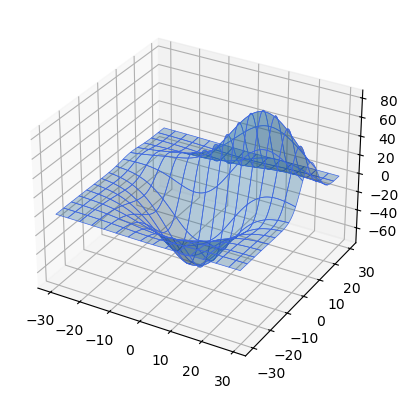

In [2]:
ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.3)

plt.show()

### Konturlinien

Eine weitere Möglichkeit, Skalarfelder darzustellen, bieten __Konturdiagramme__. Dabei blickt man von oben auf die $x,y$-Ebene und verbindet Punkte mit gleichem Funktionwsert. Durch die entstehendenen Linien erhält man einen guten Eindruck.

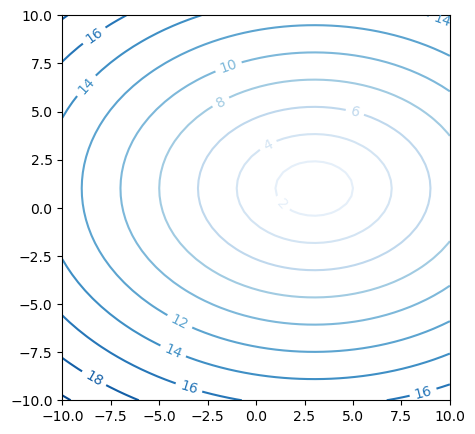

In [3]:
f = lambda x,y :  np.sqrt((x-3)**2 + 2* (y-1)**2)

x,y = np.meshgrid(np.linspace(-10.0, 10.0, 50), np.linspace(-10.0, 10.0,50))

plt.figure(figsize=(5,5))
cp = plt.contour(x,y,f(x,y),levels=10,cmap='Blues')
plt.clabel(cp, inline=True, fontsize=10)

plt.show()

Die Funktion $f(x,y) = \sqrt{(x-3)^2 + 2 (y-1)^2}$ verfügt über ein Minimum im Punkt $(x_0,y_0)=(3,1)$.

### Extremalwerte bei Funktionen mit mehreren Veränderlichen

Das Vorgehen im eindimensionalen Fall lässt sich verallgemeinern: Ist $f$ eine reellwertige Funktion (ein __Skalarfeld__) in mehreren Veränderlichen, d.h., so verschwinden in einem Extremalpunkt alle __Richtungsableitungen__, d.h es gilt
$$\frac{\partial f} {\partial x_i} =0$$
für alle Richtungen $x_1, x_2,\ldots, x_N$. Dir Richtungsableitungen werden zu einem Vektor zusammgefasst, dem __Gradienten__. In einem extremalen Punkt ist der Gradient also gleich null:
$$\nabla f := \text{grad} f := (\frac{\partial f} {\partial x_i},\ldots,\frac{\partial f} {\partial x_N}) = 0 \$$

Im Fall von $N=1$ fällt dies mit der einfachen 1. Ableitung zusammen. Im mehrdimensionalen Fall ist für die Bestimmung der Extremalstelle also nicht nur eine, sondern $N$ Gleichungen zu lösen.

Dem Gradienten kommt eine weitere Bedeutung zu: Mathematisch gesehen ist der Gradient ein __Vektorfeld__, der jedem Punkt einen Verktor zurordnet. Dieser Verktor zeigt stets in die Richtung des stärksten Anstiegs der skalaren Funktion; seine Länge entspricht dabei der Stärke des Zuwaches. Befinetet man sich also in der Nähre eines Maximums und folgt dem Gradienten, so nimmt dessen Größe immer weiter ab, bis er im Maximum schließlich zu null wird.

### Das Gradientenabstiegsverfahren
Der Umkehrschluss: Sucht man ein (lokales) __Minimum__ einer Funktion, so ist es ein vernünftiges Vorgehen, in Richtung des negativen Gradienten zu suchen. Dieses Vorgehen wird __Gradientenabstiegsverfahren__ genannt.

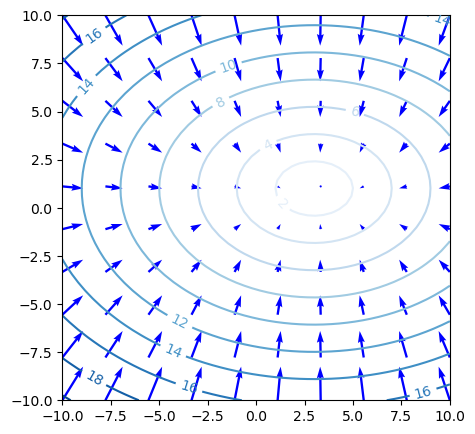

In [4]:
f =  np.sqrt((x-3)**2 + 2* (y-1)**2)
dfx = lambda x : 2 * x - 6
dfy = lambda y : 4 * y - 2

norm  = lambda x,y:  np.sqrt(dfx(x)**2 + dfy(y)**2 )

x1,y1 = np.meshgrid(np.linspace(-10.0, 10.0, 10), np.linspace(-10.0, 10.0,10))

plt.figure(figsize=(5,5))
cp = plt.contour(x,y,f,levels=10,cmap='Blues')
plt.clabel(cp, inline=True, fontsize=10)
plt.quiver(x1,y1,-dfx(x1)  ,-dfy(y1),color='blue')

plt.show()
